In [6]:
!pip install category_encoders
!pip install --upgrade category_encoders

In [10]:
!pip install scikit-learn==0.24.2

     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ------------ --------------------------- 2.4/7.5 MB 10.3 MB/s eta 0:00:01
     --------------------------- ------------ 5.2/7.5 MB 11.0 MB/s eta 0:00:01
     ---------------------------------------- 7.5/7.5 MB 11.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [20 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\dell\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
      return hook(metadata_directory, config_settings)
             ^^^^^^^^^^^^^^^

In [13]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from contextlib import contextmanager
from time import time
from tqdm import tqdm
import lightgbm as lgbm
import category_encoders as ce
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

ImportError: cannot import name 'Tags' from 'sklearn.utils' (C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\__init__.py)

In [26]:
data=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\animals_info new.csv')
display(data[0:2].T)
print(len(data))
print(data.columns.tolist())

,0,1
Name,Grey Wolf,Tiger
Genus,Canis,Panthera
Species,Canis lupus,Panthera tigris
Kingdom,Animalia,Animalia
Subphylum,Vertebrata,Vertebrata
Class,Mammalia,Mammalia
Order,Carnivora,Carnivora
Family,Canidae,Felidae
Attributes,"Nocturnal,Carnivore,Scavenger,Terrestrial,Curs...","Nocturnal,Carnivore,Cursorial,Terrestrial,Ambu..."


29357
['Name', 'Genus', 'Species', 'Kingdom', 'Subphylum', 'Class', 'Order', 'Family', 'Attributes']


In [27]:
data['Species'].value_counts()

Species
Canidae              60
Viperidae            50
Felidae              49
Colubridae           47
Cervinae             36
                     ..
Asaccus gardneri      1
Andinosaura aurea     1
Anadia vittata        1
Anadia escalerae      1
Asthenes virgata      1
Name: count, Length: 28688, dtype: int64

In [28]:
words=set()
for i in range(len(data)):
    tx=data.loc[i,'Attributes'].split(',')
    words=words | set(tx)
print(words)

{'Zoochory', 'Gliding Animals', 'Giant Animals', 'Grazing', 'Mycophage', 'starts with', 'Dangerous', 'Pursuit predator', 'Creepy Animals', 'Colorful Animals', 'Altitudinal Migrant', 'Polygyny', 'Nectarivore', 'Cute', 'Pack hunters', 'Partial Migrant', 'Generally solitary', 'Pelagic birds', 'Semiaquatic', 'Myrmecophagous', 'Nomadic', 'Pollinator', 'Territorial', 'Highly venomous', 'Vicious Animals', 'Brumation', 'Lucky Animals', 'Solitary', 'U.S. States Animals', 'Canada Province Animals', 'Precocial', 'Chatterboxes', 'Polygynandry', 'Mesopredator', 'Non-venomous', 'Sanguivore', 'Dominance hierarchy', 'Not a migrant', 'Weird Animals', 'Hypercarnivore', 'Tiny Animals', 'Green Animals', 'Snow White', 'Canada Province Birds', 'Waterfowl', 'Aquatic', 'Smart Animals', 'Herbivore', 'Spotted Animals', 'Folivore', 'Polygamy', 'Seabird', 'Monogamy', 'Colonial', 'Lignivore', 'Wild', 'Algivore', 'Apex predator', 'Vermivorous', 'Travelers ', 'Gumivorous', 'Harbingers Of Misfortune', 'Predator', 'Ca

In [29]:
# one hot encoding
for word in words:
    data[word] = data['Attributes'].apply(lambda x: 1 if word in x.split(',') else 0)
print(data.columns.tolist())

C:\Users\dell\AppData\Local\Temp\ipykernel_5496\1406789293.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[word] = data['Attributes'].apply(lambda x: 1 if word in x.split(',') else 0)
C:\Users\dell\AppData\Local\Temp\ipykernel_5496\1406789293.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[word] = data['Attributes'].apply(lambda x: 1 if word in x.split(',') else 0)
C:\Users\dell\AppData\Local\Temp\ipykernel_5496\1406789293.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

['Name', 'Genus', 'Species', 'Kingdom', 'Subphylum', 'Class', 'Order', 'Family', 'Attributes', 'Zoochory', 'Gliding Animals', 'Giant Animals', 'Grazing', 'Mycophage', 'starts with', 'Dangerous', 'Pursuit predator', 'Creepy Animals', 'Colorful Animals', 'Altitudinal Migrant', 'Polygyny', 'Nectarivore', 'Cute', 'Pack hunters', 'Partial Migrant', 'Generally solitary', 'Pelagic birds', 'Semiaquatic', 'Myrmecophagous', 'Nomadic', 'Pollinator', 'Territorial', 'Highly venomous', 'Vicious Animals', 'Brumation', 'Lucky Animals', 'Solitary', 'U.S. States Animals', 'Canada Province Animals', 'Precocial', 'Chatterboxes', 'Polygynandry', 'Mesopredator', 'Non-venomous', 'Sanguivore', 'Dominance hierarchy', 'Not a migrant', 'Weird Animals', 'Hypercarnivore', 'Tiny Animals', 'Green Animals', 'Snow White', 'Canada Province Birds', 'Waterfowl', 'Aquatic', 'Smart Animals', 'Herbivore', 'Spotted Animals', 'Folivore', 'Polygamy', 'Seabird', 'Monogamy', 'Colonial', 'Lignivore', 'Wild', 'Algivore', 'Apex pre

C:\Users\dell\AppData\Local\Temp\ipykernel_5496\1406789293.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[word] = data['Attributes'].apply(lambda x: 1 if word in x.split(',') else 0)
C:\Users\dell\AppData\Local\Temp\ipykernel_5496\1406789293.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[word] = data['Attributes'].apply(lambda x: 1 if word in x.split(',') else 0)


In [30]:
display(data[0:2].T)

,0,1
Name,Grey Wolf,Tiger
Genus,Canis,Panthera
Species,Canis lupus,Panthera tigris
Kingdom,Animalia,Animalia
Subphylum,Vertebrata,Vertebrata
...,...,...
Congregatory,0,0
Cosmopolitan,0,0
Recently Extinct,0,0
Island endemic,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [32]:
data=labelencoder(data)

In [33]:
target='Species'
dataY=data[target]
dataX=data.drop(target,axis=1)

In [34]:
df_columns = list(dataX.columns)

In [35]:
m=len(dataX)
print(m)
M=list(range(m))
random.seed(2021)
random.shuffle(M)

trainX=dataX.iloc[M[0:(m//5)*4]]
trainY=dataY.iloc[M[0:(m//5)*4]]
testX=dataX.iloc[M[(m//5)*4:]]
testY=dataY.iloc[M[(m//5)*4:]]

29357


In [36]:
train_df=trainX
test_df=testX

In [37]:
train_df.columns=df_columns
test_df.columns=df_columns

In [38]:
def create_numeric_feature(input_df):
    use_columns = df_columns 
    return input_df[use_columns].copy()

In [39]:
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [40]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric_feature,
    ]
    
    out_df = pd.DataFrame()
    
    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)

        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)
        
    return out_df

In [41]:
train_feat_df = to_feature(train_df)
test_feat_df = to_feature(test_df)

100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


createcreate_numeric_feature  0.221[s]


  0%|          | 0/1 [00:00<?, ?it/s]

createcreate_numeric_feature  0.149[s]


100%|██████████| 1/1 [00:00<00:00,  6.33it/s]


In [42]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X, y, cv, 
             params: dict=None, 
             verbose: int=50):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=float)

    for i, (idx_train, idx_valid) in enumerate(cv): 
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)
        
        with Timer(prefix='fit fold={} '.format(i)):
            clf.fit(x_train, y_train, 
                    eval_set=[(x_valid, y_valid)])

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')
        print()

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSLE: {:.4f}'.format(score))
    return oof_pred, models

In [43]:
params = {
    'objective': 'rmse', 
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5, 
    'n_estimators': 1000, 
    'colsample_bytree': .5, 
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain', 
    'random_state': 71,
    'num_leaves': 62
}

In [44]:
y = trainY
ydf=pd.DataFrame(y)

In [45]:
from sklearn.model_selection import KFold

for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 18787, number of used features: 110
[LightGBM] [Info] Start training from score 14348.076596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

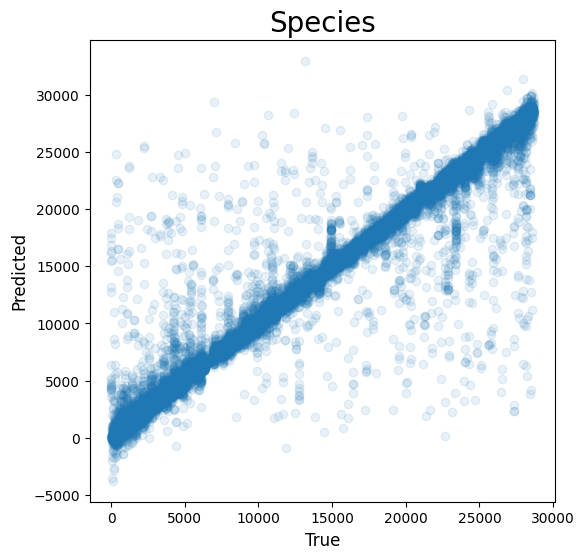

In [46]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(target,fontsize=20)
ax.set_ylabel('Predicted',fontsize=12)
ax.set_xlabel('True',fontsize=12)
ax.scatter(y,oof,alpha=0.1)

In [47]:
def visualize_importance(models, feat_train_df):

    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df], 
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df, 
                  x='feature_importance', 
                  y='column', 
                  order=order, 
                  ax=ax, 
                  palette='viridis', 
                  orient='h')
    
    ax.tick_params(axis='x', rotation=0)
    #ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig,ax

#fig, ax = visualize_importance(models, train_feat_df)


In [ ]:
for i in range(1):
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    ydfi=ydf.iloc[:,i]
    y=np.array(ydfi)
    cv = list(fold.split(train_feat_df, y))
    oof, models = fit_lgbm(train_feat_df.values, y, cv, params=params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 18787, number of used features: 110
[LightGBM] [Info] Start training from score 14348.076596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
fig, ax = visualize_importance(models, train_feat_df)
ax.set_title(target+' Imortance',fontsize=20)

In [ ]:
preds=[]
for i in range(5):
    preds += [models[i].predict(test_feat_df.values)/5]
predsT=np.array(preds).T
preds2=[]
for item in predsT:
    value=sum(item)
    preds2+=[value]
print(preds2[0:5])

In [ ]:
for i in range(1):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(oof, label='Train Predicted '+target[i], ax=ax, color='C1',bins=30,alpha=0.5)
    sns.histplot(preds2, label='Test Predicted '+target[i], ax=ax, color='black',bins=30,alpha=0.5)
    ax.legend()
    ax.grid()

In [ ]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_title(target,fontsize=20)
ax.set_ylabel('Test Predicted',fontsize=12)
ax.set_xlabel('Test True',fontsize=12)
ax.scatter(testY,preds2,alpha=0.1)
plt.show()